In [217]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()

from sklearn.metrics import mean_squared_error,mean_absolute_error

In [218]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')

In [219]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Exploratory Data Analysis (EDA)

In [220]:
# this column is not much important for the prediction

del df['Unnamed: 0']

In [221]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [222]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [223]:
df.shape

(200, 4)

In [224]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [225]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [226]:
df.sample(3)

,TV,radio,newspaper,sales
108,13.1,0.4,25.6,5.3
70,199.1,30.6,38.7,18.3
98,289.7,42.3,51.2,25.4


# Checking null values :

In [227]:

# There are no NULL values in the dataset, hence it is clean.

df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [228]:
df.isnull()

,TV,radio,newspaper,sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


<AxesSubplot:>

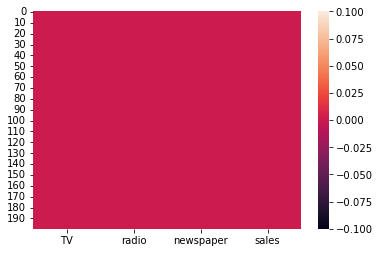

In [229]:
sns.heatmap(df.isnull())

There are no NULL values in the dataset, hence it is clean.


In [230]:
df['sales'].unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

In [231]:
df['sales'].nunique()

121

In [232]:
df.shape

(200, 4)

In [233]:
df.loc[df['sales']== " "]

,TV,radio,newspaper,sales


After some observation, there are no white space in the data

In [234]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

# describe the data

In [235]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [236]:
round(df.describe(),2)

,TV,radio,newspaper,sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,14.02
std,85.85,14.85,21.78,5.22
min,0.70,0.00,0.30,1.60
25%,74.38,9.98,12.75,10.38
50%,149.75,22.90,25.75,12.90
75%,218.82,36.52,45.10,17.40
max,296.40,49.60,114.00,27.00


<AxesSubplot:>

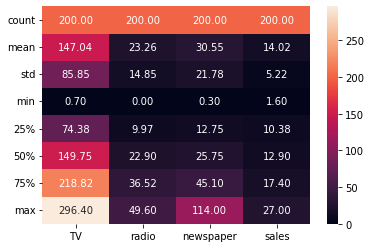

In [237]:
sns.heatmap(df.describe(),annot=True,color='white',fmt='0.2f')

# Outcome of describe of datasets

from the above plotting we are determining mean, std,min,max value of each column.

In [238]:
df.shape

(200, 4)

Tv :

1. Mean=147.04
2. std=85.85
3. min_values=0.70
4. max_values=296.40


radio:
    
1. Mean=23.26
2. std=14.85
3. min_values=0.00
4. max_values=49.60


newspaper:
    
1. Mean=30.55
2. std=21.78
3. min_values=0.30
4. max_values=114.00


sales :
    
1. Mean=14.02
2. std=21.78
3. min_values=5.22
4. max_values=27.00

# Data Cleaning

In [239]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Ther is no null values so data is clean

# Outlier Analysis :

<AxesSubplot:>

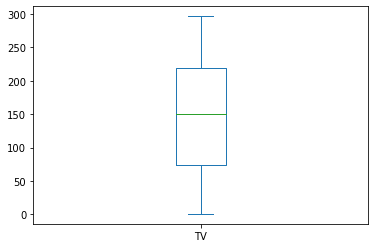

In [240]:
df['TV'].plot.box()

Ther is no outliers

<AxesSubplot:>

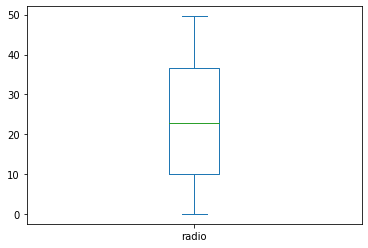

In [241]:
df['radio'].plot.box()

there is no outliers

<AxesSubplot:>

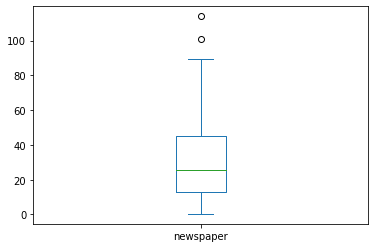

In [242]:
df['newspaper'].plot.box()

outliers is present there

<AxesSubplot:>

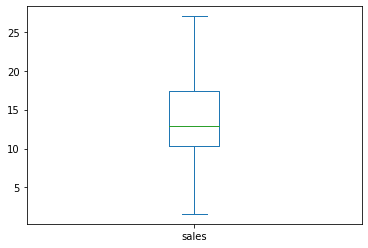

In [243]:
df['sales'].plot.box()

there is no outliers

# There are no considerable outliers present in the data.

# Univariate Analysis¶

Sales (Target Variable)

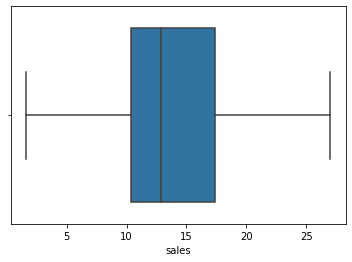

In [244]:
import warnings

warnings.filterwarnings('ignore')

sns.boxplot(df['sales'])
plt.show()

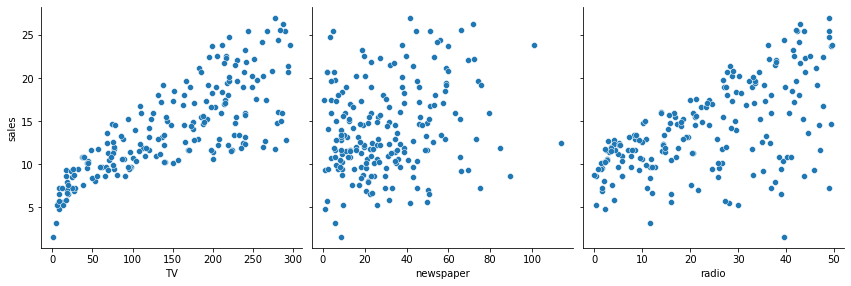

In [245]:
# Let's see how Sales are related with other variables using scatter plot.


sns.pairplot(df, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

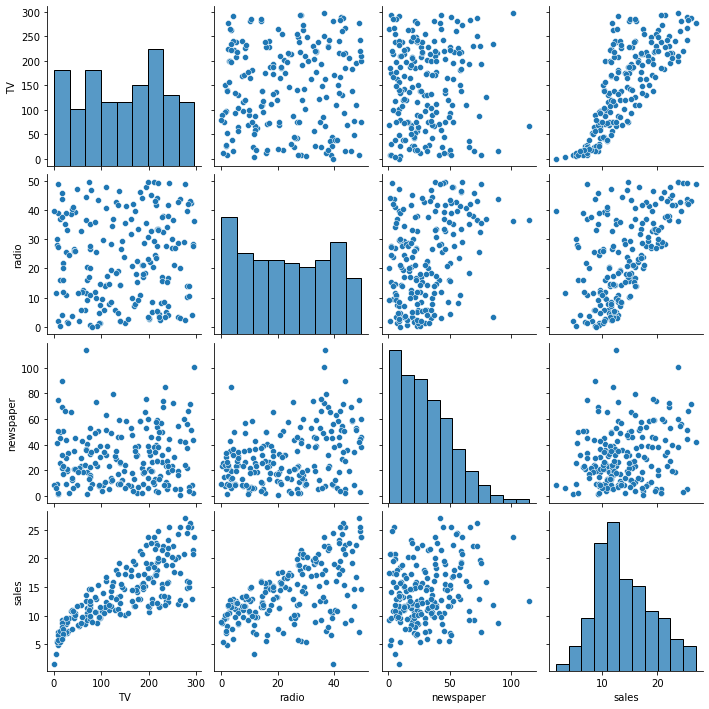

In [246]:
sns.pairplot(df)

# Let's see the correlation between different variables.


In [247]:
# Let's see the correlation between different variables.

df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


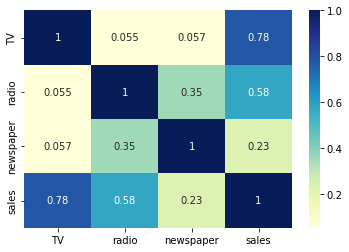

In [248]:
# Let's see the correlation between different variables.

sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

# seprating the data into features and target  :

In [258]:
X = df['TV']
y = df['sales']


In [260]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.2)
    lm.fit(x_train,y_train)
    pred_train=lm.predict(x_train)
    pred_test=lm.predict(x_test)
    print(f'At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)}')
    print(f'At random state {i},the training accuracy is :- {r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is :- 0.9067114990146383
At random state 0,the training accuracy is :- 0.8601145185017868


At random state 1,the training accuracy is :- 0.8959372632325174
At random state 1,the training accuracy is :- 0.8927605914615384


At random state 2,the training accuracy is :- 0.9151707412454462
At random state 2,the training accuracy is :- 0.7575894500772717


At random state 3,the training accuracy is :- 0.8930288385772915
At random state 3,the training accuracy is :- 0.9138375011080566


At random state 4,the training accuracy is :- 0.8911672911176578
At random state 4,the training accuracy is :- 0.9085774752313167


At random state 5,the training accuracy is :- 0.8956962280033929
At random state 5,the training accuracy is :- 0.8984204533332627


At random state 6,the training accuracy is :- 0.8915418760966582
At random state 6,the training accuracy is :- 0.922433347392203


At random state 7,the training accuracy is :- 0.8929164670647455
At random st

In [261]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=99,test_size=0.2)

In [263]:
# train the model

lm.fit(x_train,y_train)

LinearRegression()

In [264]:
pred_test=lm.predict(x_test)
print(r2_score(y_test,pred_test))

0.9200846680148507


# Cross_Validation of the model

In [265]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for j in range(2,10):
    cv_score=cross_val_score(lm,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy for testing is {test_accuracy}')
    print('\n')

At cross fold2 the cv score is 0.8908473589845056 and accuracy score for training is 0.8906288862925659 and accuracy for testing is 0.9200846680148507


At cross fold3 the cv score is 0.8916464591145559 and accuracy score for training is 0.8906288862925659 and accuracy for testing is 0.9200846680148507


At cross fold4 the cv score is 0.8900070660549507 and accuracy score for training is 0.8906288862925659 and accuracy for testing is 0.9200846680148507


At cross fold5 the cv score is 0.8871063495438436 and accuracy score for training is 0.8906288862925659 and accuracy for testing is 0.9200846680148507


At cross fold6 the cv score is 0.8899208882186672 and accuracy score for training is 0.8906288862925659 and accuracy for testing is 0.9200846680148507


At cross fold7 the cv score is 0.8859930219823539 and accuracy score for training is 0.8906288862925659 and accuracy for testing is 0.9200846680148507


At cross fold8 the cv score is 0.8826686689919152 and accuracy score for training 

Since the number of folds don't have such impact on the accuracy and cv_score . so cv=3 is selected


here we have handled the problem of the overfitting and the underfitting by checking the training and testing score 

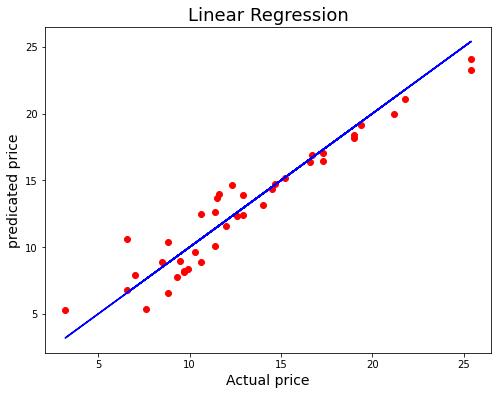

In [267]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual price',fontsize=14)
plt.ylabel('predicated price',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.savefig('lm.png')
plt.show()


Best fit line is covreing most of the datapoint which shows good fit of our model 

# Regularization

In [278]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge



In [283]:
from sklearn.linear_model import Lasso


Parameters = {'alpha':[.0001,.001,.01,.1,10],
             'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,Parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [285]:
# final model training

ls = Lasso(alpha=0.1)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

89.06270347881475

In [286]:
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss*100

92.01273051616262

In [287]:
cv_score=cross_val_score(ls,x,y,cv=3)
cv_mean=cv_score.mean()
cv_mean*100

89.1743694859938

# Ensemble Technique

In [289]:
from sklearn.ensemble import RandomForestRegressor

In [291]:
Parameters = {'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,Parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [298]:
rf = RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
training_r2=rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('r2 score:',rfs*100)


rfscore=cross_val_score(rf,x,y,cv=2)

rfc = rfscore.mean()
print('cross_val_score=',rfc*100)

r2 score: 98.53175028575217
cross_val_score= 97.20727972836517


We are getting model accuracy and cross validation both are 97.2% which shows our model is performing is extremely well

In [300]:
import pickle

In [301]:
filename='Total_sales.pkl'
pickle.dump(rf,open(filename,'wb'))

# conclusion:

In [303]:
loaded_model=pickle.load(open('Total_sales.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

98.53175028575217


In [305]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','original'])

In [306]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Predicted,11.534,9.163,10.213,8.413,7.089,22.556,12.209,25.337,6.238,17.874,...,11.466,25.167,18.56,12.089,10.483,14.795,13.059,16.771,11.788,8.723
original,11.534,9.163,10.213,8.413,7.089,22.556,12.209,25.337,6.238,17.874,...,11.466,25.167,18.56,12.089,10.483,14.795,13.059,16.771,11.788,8.723
